<a href="https://colab.research.google.com/github/sejin-sim/Competitions/blob/main/%5BDACON%5D_%EC%95%84%ED%8C%8C%ED%8A%B8_%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * 아파트 실거래가 예측 From DACON
1. Collection : from DACON
2. EDA : display & info & isnull().sum() & train['type'].value_counts() 등
3. Preprocessing 
4. Feature Engineering
5. Modeling
6. Evaluation : DACON 업로드를 통해 순위 확인 가능

In [ ]:
import pandas as pd
import numpy as np

path_drive = '/content/drive/My Drive/Colab Notebooks/dataset/Apart'
train = pd.read_csv(path_drive + '/train.csv', index_col=0)
test = pd.read_csv(path_drive + '/test.csv', index_col=0)
park = pd.read_csv(path_drive + '/park.csv')
care = pd.read_csv(path_drive + '/day_care_center.csv')
sample_submission = pd.read_csv(path_drive + '/submission.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


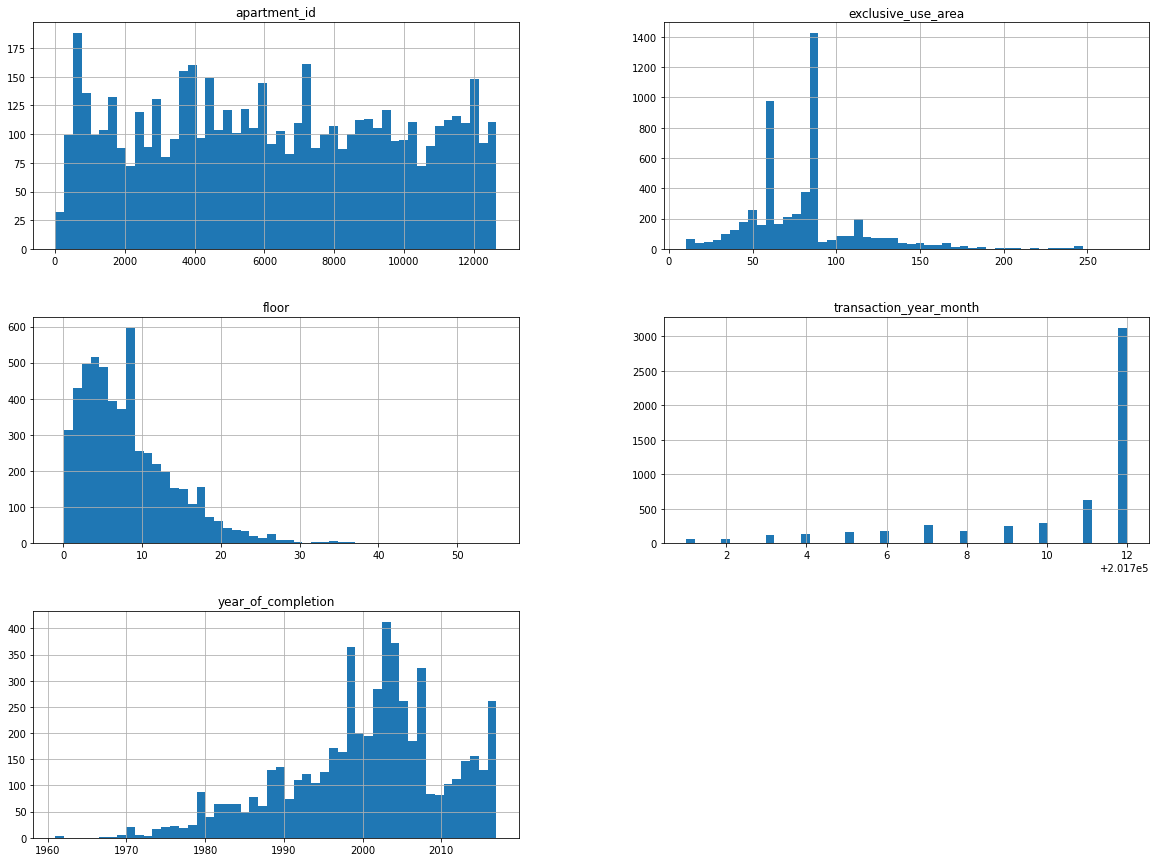

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
test.hist(bins=50, figsize=(20,15))
plt.show() # 샘플수 = 수직축(y), 주어진 값 범위 = 수평 축(x)

In [ ]:
display(train, test)

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
transaction_id,,,,,,,,,,,,
0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...
1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500


,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
transaction_id,,,,,,,,,,,
1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21
...,...,...,...,...,...,...,...,...,...,...,...
1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.0500,2003,201710,11~20,7
1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.9300,2009,201712,1~10,4
1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.1880,2004,201712,21~31,23


* train : 1216553 rows × 12 columns
* test : 5463 rows × 11 columns 

* transaction_id : 아파트 거래에 대한 유니크한 아이디
* apartment_id : 아파트 아이디
* city : 도시
* dong : 동
* jibun : 지번
* apt : 아파트단지 이름
* addr_kr : 주소
* exclusive_use_area : 전용면적
* year_of_completion : 설립일자
* transaction_year_month : 거래년월
* transaction_date : 거래날짜
* floor : 층
* transaction_real_price : 실거래가 = Y = (target variable)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216553 entries, 0 to 1234827
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   apartment_id            1216553 non-null  int64  
 1   city                    1216553 non-null  object 
 2   dong                    1216553 non-null  object 
 3   jibun                   1216553 non-null  object 
 4   apt                     1216553 non-null  object 
 5   addr_kr                 1216553 non-null  object 
 6   exclusive_use_area      1216553 non-null  float64
 7   year_of_completion      1216553 non-null  int64  
 8   transaction_year_month  1216553 non-null  int64  
 9   transaction_date        1216553 non-null  object 
 10  floor                   1216553 non-null  int64  
 11  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 120.7+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5463 entries, 1145756 to 1218921
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   apartment_id            5463 non-null   int64  
 1   city                    5463 non-null   object 
 2   dong                    5463 non-null   object 
 3   jibun                   5463 non-null   object 
 4   apt                     5463 non-null   object 
 5   addr_kr                 5463 non-null   object 
 6   exclusive_use_area      5463 non-null   float64
 7   year_of_completion      5463 non-null   int64  
 8   transaction_year_month  5463 non-null   int64  
 9   transaction_date        5463 non-null   object 
 10  floor                   5463 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 512.2+ KB


In [ ]:
# 결측값 x
train.isnull().sum()
test.isnull().sum()

apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
dtype: int64

* 총 1216553개의 데이터, 약 120만개
* 평균 : 38227.69
* 표준편차 : 31048.98
* min : 100
* max : 820000, 82만

In [ ]:
train['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


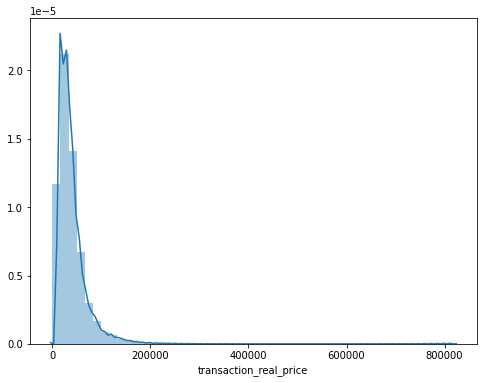

In [ ]:
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (8,6))

sns.distplot(train['transaction_real_price'])
# print("%s -> Skewness: %f, Kurtosis: %f"%('transaction_real_price', train['transaction_real_price'].skew(), train['transaction_real_price'].kurt()))
# 왜도(Skewness) : 왼쪽으로 치우쳐져 있을수록 값이크고, 오른쪽으로 치우쳐져 있을 수록 값이 작아진다. 즉, 0에 가까울수록 좋은 형태
# 첨도(Kurtosis) : 첨도 값이 3에 가까울 경우 정규분포에 가까우며, 첨도 값이 클수록 뾰족하고 값이 작을 수록 완만해진다

* 전용 면적이 제일큰 상관관계를 갖고 있음을 알 수 있다.

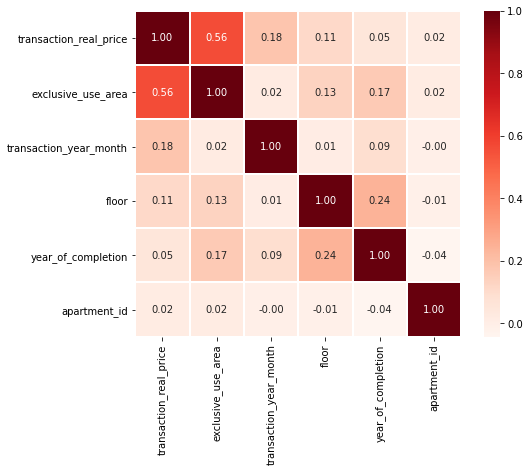

In [ ]:
#상관관계 확인
k= train.shape[1] #히트맵 변수 갯수 = 12개
corrmat = train.corr() # 변수간의 상관계수
#                         apartment_id  ...  transaction_real_price
# apartment_id                1.000000  ...                0.017576
# exclusive_use_area          0.015098  ...                0.561563
# year_of_completion         -0.042868  ...                0.052656
# transaction_year_month     -0.002918  ...                0.183910
# floor                      -0.011769  ...                0.112278
# transaction_real_price      0.017576  ...                1.000000

cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index # price기준으로 제일 큰순서로 6개
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=1, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

In [ ]:
display(park, care)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,NaN,조합놀이 1기,NaN,NaN,NaN,2006.0,2019-02-25
1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,NaN,NaN,NaN,NaN,NaN,2005.0,2019-02-25


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31
...,...,...,...,...,...,...,...,...,...,...,...
7546,부산광역시,금정구,해바라기어린이집,민간,46,13.0,NaN,NaN,NaN,y,2019-01-21
7547,부산광역시,금정구,해수어린이집,가정,19,6.0,NaN,NaN,NaN,y,2019-01-21
7548,부산광역시,금정구,행복한그림동산어린이집,민간,92,16.0,NaN,NaN,NaN,y,2019-01-21
7549,부산광역시,금정구,행복한어린이집,민간,43,12.0,NaN,NaN,NaN,y,2019-01-21


In [ ]:
park['city-dong'] = park['city']+park['dong']
park_1 = park.groupby(['city-dong'],group_keys = False).mean().reset_index()
display(park_1)

,city-dong,park_area,park_open_year
0,부산광역시가야동,24254.000000,1994.666667
1,부산광역시감만동,4667.333333,2009.333333
2,부산광역시감천동,21463.833333,2012.333333
3,부산광역시개금동,9625.500000,1988.000000
4,부산광역시거제동,4139.033333,1997.666667
...,...,...,...
234,서울특별시회기동,400.000000,2011.000000
235,서울특별시효창동,85901.000000,1960.500000
236,서울특별시후암동,1261.000000,1972.500000
237,서울특별시휘경동,1393.180000,2008.000000


In [ ]:
train['city-dong'] = train['city']+train['dong']
test['city-dong'] = test['city']+test['dong']

train = pd.merge(train, park_1, on='city-dong', how='left')
test = pd.merge(test, park_1, on='city-dong', how='left')


In [ ]:
train.isnull().sum() # NaN 값이 많아서 처리가 필요하다.


apartment_id                   0
city                           0
dong                           0
jibun                          0
apt                            0
addr_kr                        0
exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_real_price         0
city-dong                      0
park_area                 265587
park_open_year            426113
dtype: int64

In [ ]:
display(train, test)

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city-dong,park_area,park_open_year
0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500,서울특별시신교동,NaN,NaN
1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000,서울특별시필운동,NaN,NaN
2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500,서울특별시필운동,NaN,NaN
3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000,서울특별시내수동,NaN,NaN
4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000,서울특별시내수동,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000,부산광역시정관읍 용수리,NaN,NaN
1216549,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750,부산광역시정관읍 용수리,NaN,NaN
1216550,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500,부산광역시정관읍 용수리,NaN,NaN
1216551,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700,부산광역시정관읍 용수리,NaN,NaN


,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,city-dong,park_area,park_open_year
0,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,서울특별시목동,NaN,NaN
1,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,부산광역시초량동,NaN,NaN
2,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,부산광역시괴정동,3586.300000,2015.000000
3,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,서울특별시대치동,5509.754545,NaN
4,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,부산광역시다대동,59564.840000,2000.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.0500,2003,201710,11~20,7,서울특별시양재동,21648.285714,1981.166667
5459,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.9300,2009,201712,1~10,4,서울특별시반포동,5342.405882,1983.562500
5460,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.1880,2004,201712,21~31,23,서울특별시구로동,3784.454545,1985.727273
5461,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.4400,2005,201710,21~31,1,서울특별시홍제동,2098.312500,1986.500000


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['city']=le.fit_transform(train['city']) # city & dong 은 인코딩
train['dong']=le.fit_transform(train['dong'])
train['park_area'].fillna(train['park_area'].mean(), inplace=True)     # NaN 값 처리
train['park_open_year'].fillna(train['park_open_year'].mean(), inplace=True)

test['city']=le.fit_transform(test['city'])
test['dong']=le.fit_transform(test['dong'])
test['park_area'].fillna(test['park_area'].mean(), inplace=True)
test['park_open_year'].fillna(test['park_open_year'].mean(), inplace=True)

# jibun, apt, addr_kr 은 제외 시킨다
train_x = train.drop(columns=['transaction_real_price','jibun', 'apt', 'addr_kr','transaction_date','city-dong'],axis=1) 
train_y = train['transaction_real_price']
test_x = test.drop(columns=['jibun', 'apt', 'addr_kr','transaction_date','city-dong'],axis=1)


display(train_x, train_y, test_x)

,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,floor,park_area,park_open_year
0,7622,1,257,84.8200,2002,200801,2,363911.946468,1990.452425
1,5399,1,437,99.1700,1973,200801,6,363911.946468,1990.452425
2,3578,1,437,84.7400,2007,200801,6,363911.946468,1990.452425
3,10957,1,68,146.3900,2003,200801,15,363911.946468,1990.452425
4,10639,1,68,194.4300,2004,200801,3,363911.946468,1990.452425
...,...,...,...,...,...,...,...,...,...
1216548,9578,0,382,59.8245,2012,201711,3,363911.946468,1990.452425
1216549,9578,0,382,84.9923,2012,201711,7,363911.946468,1990.452425
1216550,9578,0,382,84.9923,2012,201711,9,363911.946468,1990.452425
1216551,9586,0,382,101.7400,2008,201711,7,363911.946468,1990.452425


0           37500
1           20000
2           38500
3          118000
4          120000
            ...  
1216548     22000
1216549     30750
1216550     29500
1216551     26700
1216552     28800
Name: transaction_real_price, Length: 1216553, dtype: int64

,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,floor,park_area,park_open_year
0,10453,1,123,35.5500,2002,201711,2,290135.703074,1988.822280
1,989,0,345,68.7200,1977,201708,2,290135.703074,1988.822280
2,8597,0,24,72.5400,1989,201710,2,3586.300000,2015.000000
3,11086,1,81,111.5400,2004,201707,10,5509.754545,1988.822280
4,2121,0,61,119.6398,2014,201712,21,59564.840000,2000.900000
...,...,...,...,...,...,...,...,...,...
5458,8965,1,242,84.0500,2003,201710,7,21648.285714,1981.166667
5459,3831,1,138,84.9300,2009,201712,4,5342.405882,1983.562500
5460,5550,1,25,110.1880,2004,201712,23,3784.454545,1985.727273
5461,3371,1,377,92.4400,2005,201710,1,2098.312500,1986.500000


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=777) # test는 30%로 부여

1. base : 4311.1566329524085
2. max_depth=7 : 15609.685959416256

+ park : 4077.088

In [ ]:
# 랜덤포레스트 without tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(random_state=17, verbose=1, n_jobs=-1)
rf.fit(X_train, y_train)

print(rf)
y_pred = rf.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('rmse : ', rmse)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=17, verbose=1, warm_start=False)


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.8s


rmse :  4101.8756718770655


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   15.0s finished


* base   14446.38746021472
* max depth 20 4299.433796708203 - best

+ park : 4109.47




In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_model = XGBRegressor(max_depth=20, random_state=17, n_jobs=-1, verbose=1, objective='reg:squarederror')
# base   14446.38746021472
# max depth 20 4299.433796708203 - best

xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print('rmse : ', rmse)
print(xgb_model)

rmse :  4114.209257048928
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbose=1, verbosity=1)


In [ ]:
y_pred_rf = rf.predict(test_x)
sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/Apart/submission.csv')
sub['transaction_real_price'] = y_pred_rf
sub.to_csv('/content/drive/My Drive/Colab Notebooks/dataset/Apart/20200910.csv', index=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
y_pred_xgb = xgb_model.predict(test_x)
sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/Apart/submission.csv')
sub['transaction_real_price'] = y_pred_xgb
sub.to_csv('/content/drive/My Drive/Colab Notebooks/dataset/Apart/20200910_xgb.csv', index=False)

# * 결론

1. 대회 내용 : 아파트 실거래가 예측
2. 훈련 데이터 : train + park(park_area,	park_open_year)
3. park : city+gu로 핏쳐를 합친뒤, park_area,	park_open_year 평균으로 groub by
4. train : 해당되는 city + gu에 park_area & year을 merge
5. 사용 모델 : 랜덤포레스트(Win), XGB 
6. 결과 : 랜덤포레스트 rmse = 4077.08 으로 가장 좋은 성적

- 최종 점수

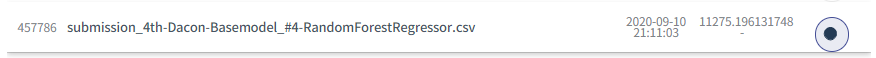